# Load Dataset

In [1]:
import pandas as pd
data = pd.read_csv('/Volumes/GoogleDrive/My Drive/MScA 2022 WINTER/MSCA 31008 5 Data Mining Principles/Project/vehicles.csv')
msrp = pd.read_csv('/Users/akhirsyabani/Downloads/cars_model_matches_msrp.csv')

In [2]:
dfc = data.copy()
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [3]:
# msrp file doesn't include 'manufacturer' = null
print(dfc["manufacturer"].isnull().sum())
print(len(dfc)-len(msrp))

17646
17646


In [4]:
# remove 'manufacturer' = null from dfc_cut
dfc_cut = dfc[dfc["manufacturer"].notnull()]
# check length difference (should be 0)
len(dfc_cut)-len(msrp)

0

In [5]:
# reset both indexes as they are supposed to have same orders of rows already
dfc_cut.reset_index(inplace=True)
msrp.reset_index(inplace=True)

In [6]:
# check header match before merging (same)
dfc_cut.head(2)

,index,id,url,region,region_url,price,year,manufacturer,model,condition,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,27,7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,good,...,NaN,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.59,-85.48,2021-05-04T12:31:18-0500
1,28,7316814758,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,good,...,NaN,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.59,-85.48,2021-05-04T12:31:08-0500


In [7]:
# check header match before merging (same)
msrp.head(2)

,index,Unnamed: 0,matched_model,match_score,Make,Model,Year,Engine Cylinders,Vehicle Style,MSRP,Drive Wheels,Transmission Type,combined name
0,0,0,Gmc Sierra 3500Hd Cc,0.708333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,Chevrolet Silverado 1500,1.000000,Chevrolet,Silverado 1500,2015.0,8.0,Crew Cab Pickup,46110.0,4WD,AUTOMATIC,Chevrolet Silverado 1500


In [8]:
# perform merging dfc_cut & msrp -> dfcar
dfcar = dfc_cut.merge(msrp, left_index=True, right_on="index")

In [9]:
# check header (should be mostly matched, though may not be perfect)
dfcar[['manufacturer','model','matched_model','Make','Model','match_score']].head()

,manufacturer,model,matched_model,Make,Model,match_score
0,gmc,sierra 1500 crew cab slt,Gmc Sierra 3500Hd Cc,NaN,NaN,0.708333
1,chevrolet,silverado 1500,Chevrolet Silverado 1500,Chevrolet,Silverado 1500,1.000000
2,chevrolet,silverado 1500 crew,Chevrolet Silverado 1500,Chevrolet,Silverado 1500,0.905660
3,toyota,tundra double cab sr,Chevrolet Beretta,Chevrolet,Beretta,0.454545
4,ford,f-150 xlt,Ford F-150 Heritage,Ford,F-150 Heritage,0.424242


In [10]:
# check tail (should be mostly matched, though may not be perfect)
dfcar[['manufacturer','model','matched_model','Make','Model','match_score']].tail()

,manufacturer,model,matched_model,Make,Model,match_score
409229,nissan,maxima s sedan 4d,Mazda Millenia,Mazda,Millenia,0.421053
409230,volvo,s60 t5 momentum sedan 4d,Alfa Romeo Stelvio,Alfa Romeo,Stelvio,0.416667
409231,cadillac,xt4 sport suv 4d,Cadillac SRX,Cadillac,SRX,0.432432
409232,lexus,es 350 sedan 4d,Nissan Leaf,Nissan,Leaf,0.437500
409233,bmw,4 series 430i gran coupe,BMW 4 Series Gran Coupe,BMW,4 Series Gran Coupe,0.901961


In [11]:
dfcar.to_csv('dfcar.csv')

In [12]:
# remove rows with 'match_score' less than threshold
dfcar1 = dfcar[dfcar['match_score']>0.99]
len(dfcar1)

187880

In [13]:
# check all column names
dfcar1.columns

Index(['index', 'index_x', 'id', 'url', 'region', 'region_url', 'price',
       'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size',
       'type', 'paint_color', 'image_url', 'description', 'county', 'state',
       'lat', 'long', 'posting_date', 'index_y', 'Unnamed: 0', 'matched_model',
       'match_score', 'Make', 'Model', 'Year', 'Engine Cylinders',
       'Vehicle Style', 'MSRP', 'Drive Wheels', 'Transmission Type',
       'combined name'],
      dtype='object')

In [14]:
dfcar1.head(3)

,index,index_x,id,url,region,region_url,price,year,manufacturer,model,...,match_score,Make,Model,Year,Engine Cylinders,Vehicle Style,MSRP,Drive Wheels,Transmission Type,combined name
1,1,28,7316814758,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,...,1.0,Chevrolet,Silverado 1500,2015.0,8.0,Crew Cab Pickup,46110.0,4WD,AUTOMATIC,Chevrolet Silverado 1500
7,7,34,7316285779,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,35000,2019.0,toyota,tacoma,...,2.0,Toyota,Tacoma,2015.0,6.0,Crew Cab Pickup,27355.0,4WD,MANUAL,Toyota Tacoma
10,10,37,7316130053,https://auburn.craigslist.org/cto/d/opelika-19...,auburn,https://auburn.craigslist.org,4500,1992.0,jeep,cherokee,...,1.0,Jeep,Cherokee,2017.0,4.0,SUV,25695.0,4WD,NaN,Jeep Cherokee


In [15]:
# drop columns from dfcar that we 100% will not use for regression
dfcar1 = dfcar1.drop([
            # unnecessary indexes
            'index','index_x','index_y','Unnamed: 0',
            # unused columns from dfcar
            'id','url','region','region_url','manufacturer','model','VIN','image_url',
            'size','county','lat','long',
            # unused columns from msrp
            'combined name'
            ],axis=1)

In [16]:
dfcar1.columns

Index(['price', 'year', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'type', 'paint_color',
       'description', 'state', 'posting_date', 'matched_model', 'match_score',
       'Make', 'Model', 'Year', 'Engine Cylinders', 'Vehicle Style', 'MSRP',
       'Drive Wheels', 'Transmission Type'],
      dtype='object')

In [17]:
# maintain and rename selected msrp columns
dfcar1.rename(columns={"Make":"manufacturer_msrp", "Model":"model_msrp", "Year":"year_msrp",
                      "Engine Cylinders":"cylinders_msrp", "Vehicle Style":"vstyle_msrp",
                      "Drive Wheels":"wd_msrp","Transmission Type":"trans_msrp"},inplace=True)

In [18]:
dfcar1.columns

Index(['price', 'year', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'type', 'paint_color',
       'description', 'state', 'posting_date', 'matched_model', 'match_score',
       'manufacturer_msrp', 'model_msrp', 'year_msrp', 'cylinders_msrp',
       'vstyle_msrp', 'MSRP', 'wd_msrp', 'trans_msrp'],
      dtype='object')

In [19]:
# check before further clean up
dfcar1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187880 entries, 1 to 409223
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   price              187880 non-null  int64  
 1   year               187880 non-null  float64
 2   condition          87140 non-null   object 
 3   cylinders          107251 non-null  object 
 4   fuel               187038 non-null  object 
 5   odometer           185063 non-null  float64
 6   title_status       186328 non-null  object 
 7   transmission       186146 non-null  object 
 8   drive              136216 non-null  object 
 9   type               142745 non-null  object 
 10  paint_color        130829 non-null  object 
 11  description        187879 non-null  object 
 12  state              187880 non-null  object 
 13  posting_date       187880 non-null  object 
 14  matched_model      187880 non-null  object 
 15  match_score        187880 non-null  float64
 16  ma

In [20]:
dfcar1.to_csv('dfcar1.csv')

## Price: drop nulls

In [21]:
dfcar2 = dfcar1[dfcar1['price'].notnull()]

In [22]:
dfcar2['price'].isnull().sum()

0

In [23]:
len(dfcar2)

187880

## Year: as-is

## Odometer: modify
Remove extreme values as the data is very skewed by outliers <br>
Remove values > mean + 7*stdev

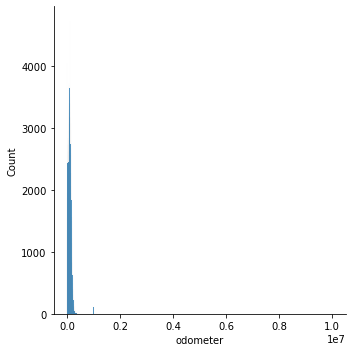

In [24]:
# visualize skewed original distribution
import seaborn as sns
sns.displot(dfcar2['odometer'].dropna())

In [25]:
odo_mean = (dfcar2['odometer'].dropna()).mean()
odo_std = (dfcar2['odometer'].dropna()).std()
outliers_upper_threshold = odo_mean + 7*odo_std
outliers_lower_threshold = odo_mean - 3*odo_std
print(outliers_upper_threshold)
print(outliers_lower_threshold)

1370072.5037961162
-435595.2291613914


In [26]:
dfcar2 = dfcar2[dfcar2['odometer']<outliers_upper_threshold]

In [27]:
len(dfcar2)

184951

## Condition: modify
Fill nulls based on odometer:
1. NaN = Fair
2. Quantile <25% = Excellent
3. Quantile >50%  = Fair
4. Quantile 25%-50% = Good

In [28]:
dfcar2['condition'].isnull().sum()

99121

In [29]:
dfcar2['odometer'].describe()

count    1.849510e+05
mean     1.025936e+05
std      6.592825e+04
min      0.000000e+00
25%      5.577300e+04
50%      9.900000e+04
75%      1.403930e+05
max      1.365000e+06
Name: odometer, dtype: float64

In [30]:
dfcar2['condition'].fillna(dfcar2.query('condition != condition')['odometer'].apply(
                            lambda x: 'excellent' if x<(5.577300 * 10000) else ('good' if x <(9.900000 * 10000)
                                                        else 'fair')),inplace=True)

In [31]:
dfcar2['condition'].isnull().sum()

0

In [32]:
dfcar2['condition'].value_counts()

excellent    78728
good         51841
fair         45047
like new      8498
new            537
salvage        300
Name: condition, dtype: int64

In [33]:
len(dfcar2)

184951

## Cylinders: modify
1. Fill NA with the most common types based on matched_model and manufacturer
2. Fill the rest of NA with most common types

In [34]:
dfcar2['cylinders'].value_counts()

4 cylinders     42233
6 cylinders     37373
8 cylinders     25055
5 cylinders       918
other             321
10 cylinders      307
3 cylinders       231
12 cylinders       19
Name: cylinders, dtype: int64

In [35]:
import numpy as np
dfcar2['cylinders'].replace('cylinders','', regex=True, inplace=True)
dfcar2['cylinders'].replace('other',np.nan, regex=True, inplace=True)

In [36]:
dfcar2['cylinders'].value_counts()

4      42233
6      37373
8      25055
5        918
10       307
3        231
12        19
Name: cylinders, dtype: int64

In [37]:
dfcar2['cylinders'].isnull().sum()

78815

In [38]:
# check cylinders_msrp
dfcar2['cylinders_msrp'].isnull().sum()

6499

In [39]:
dfcar2['cylinders_msrp'].value_counts()

4.0     75271
6.0     67860
8.0     33644
5.0       670
3.0       651
0.0       328
12.0       16
10.0       12
Name: cylinders_msrp, dtype: int64

In [40]:
dfcar2['cylinders_msrp'].replace(0,np.nan, regex=True, inplace=True)
dfcar2['cylinders_msrp'].isnull().sum()

6827

In [41]:
# create a lookup dictionary to fill up nulls
dict_cyl = dict(zip(dfcar2.matched_model, dfcar2.cylinders_msrp))

In [42]:
dfcar2['cylinders'].fillna(dfcar2['matched_model'].replace(dict_cyl),inplace=True)
dfcar2['cylinders_msrp'].fillna(dfcar2['matched_model'].replace(dict_cyl),inplace=True)

In [43]:
print(dfcar2['cylinders'].isnull().sum())
print(dfcar2['cylinders_msrp'].isnull().sum())

2988
6827


In [44]:
# create a second lookup dictionary to fill up nulls
dict_cyl2 = dict(zip(dfcar2.manufacturer_msrp, dfcar2.cylinders_msrp))

In [45]:
dfcar2['cylinders'].fillna(dfcar2['manufacturer_msrp'].replace(dict_cyl2),inplace=True)
dfcar2['cylinders_msrp'].fillna(dfcar2['manufacturer_msrp'].replace(dict_cyl2),inplace=True)

In [46]:
print(dfcar2['cylinders'].isnull().sum())
print(dfcar2['cylinders_msrp'].isnull().sum())

2678
6494


In [47]:
dfcar2['cylinders'] = dfcar2['cylinders'].astype('float64')

In [48]:
dfcar2['cylinders'].value_counts()

4.0     74973
6.0     66187
8.0     39146
5.0      1150
3.0       477
10.0      313
12.0       27
Name: cylinders, dtype: int64

In [49]:
# fill up the rest with most common = 4.0
dfcar2['cylinders'].fillna(4,inplace=True)

In [50]:
dfcar2['cylinders_msrp'].value_counts()

4.0     75419
6.0     68045
8.0     33644
5.0       670
3.0       651
12.0       16
10.0       12
Name: cylinders_msrp, dtype: int64

In [51]:
# fill up the rest with most common = 4.0
dfcar2['cylinders_msrp'].fillna(4,inplace=True)

In [115]:
print(dfcar2['cylinders'].isnull().sum())
print(dfcar2['cylinders_msrp'].isnull().sum())

0
0


In [52]:
len(dfcar2)

184951

## Fuel: modify
1. If matched with the model, take the most common type, fill it in 
2. If unsure, fill in gas 
3. Suggestion: two buckets, fossil_fuel vs non_fossil_fuel

In [53]:
dfcar2['fuel'].value_counts()

gas         172282
other         5173
diesel        4191
hybrid        2532
electric       434
Name: fuel, dtype: int64

In [54]:
dfcar2['fuel'].isnull().sum()

339

In [55]:
# create a lookup dictionary to fill up nulls
dict_fuel = dict(zip(dfcar2.matched_model, dfcar2.fuel))

In [56]:
dfcar2['fuel'].fillna(dfcar2['matched_model'].replace(dict_fuel),inplace=True)
print(dfcar2['fuel'].isnull().sum())

6


In [57]:
# fill up the remaining with 'gas'
dfcar2['fuel'].fillna('gas',inplace=True)
print(dfcar2['fuel'].isnull().sum())

0


In [58]:
dfcar2['fuel'].value_counts()

gas         172605
other         5173
diesel        4195
hybrid        2544
electric       434
Name: fuel, dtype: int64

In [59]:
len(dfcar2)

184951

## Title Status: modify
Fill with mode

In [60]:
dfcar2['title_status'].value_counts()

clean         177579
rebuilt         3435
salvage         2028
lien             598
missing          198
parts only        67
Name: title_status, dtype: int64

In [61]:
dfcar2['title_status'].fillna('clean',inplace=True)

In [62]:
dfcar2['title_status'].value_counts()

clean         178625
rebuilt         3435
salvage         2028
lien             598
missing          198
parts only        67
Name: title_status, dtype: int64

In [63]:
dfcar2['title_status'].isnull().sum()

0

In [64]:
len(dfcar2)

184951

## Transmission: drop nulls

In [65]:
dfcar2['transmission'].value_counts()

automatic    169848
manual        10332
other          3603
Name: transmission, dtype: int64

In [66]:
dfcar2['transmission'].isnull().sum()

1168

In [67]:
dfcar2 = dfcar2[dfcar2['transmission'].notnull()]

In [68]:
len(dfcar2)

183783

## Drive: modify
If matched with the model, take the most common type, fill it in 

In [69]:
dfcar2['drive'].value_counts()

4wd    59356
fwd    53951
rwd    20425
Name: drive, dtype: int64

In [70]:
dfcar2['drive'].isnull().sum()

50051

In [71]:
# create a lookup dictionary to fill up nulls
dict_drive = dict(zip(dfcar2.matched_model, dfcar2.drive))

In [72]:
dfcar2['drive'].fillna(dfcar2['matched_model'].replace(dict_drive),inplace=True)
print(dfcar2['drive'].isnull().sum())

17392


In [73]:
# create a second lookup dictionary to fill up nulls
dict_drive2 = dict(zip(dfcar2.manufacturer_msrp, dfcar2.drive))

In [74]:
dfcar2['drive'].fillna(dfcar2['manufacturer_msrp'].replace(dict_drive2),inplace=True)
print(dfcar2['drive'].isnull().sum())

10576


In [75]:
dfcar2['drive'].value_counts()

4wd    82602
fwd    66774
rwd    23831
Name: drive, dtype: int64

In [76]:
# fill the rest of NA with the most common types
dfcar2['drive'].fillna('4wd',inplace=True)
print(dfcar2['drive'].isnull().sum())

0


In [77]:
len(dfcar2)

183783

## Type: modify
If matched with the model, take the most common type, fill it in 

In [78]:
dfcar2['type'].value_counts()

SUV            41683
sedan          41427
pickup         13714
truck          13244
coupe           6680
wagon           5642
hatchback       5094
other           3901
convertible     2762
mini-van        2515
van             2471
offroad          246
bus               36
Name: type, dtype: int64

In [79]:
dfcar2['type'].isnull().sum()

44368

In [80]:
# create a lookup dictionary to fill up nulls
dict_type = dict(zip(dfcar2.matched_model, dfcar2.type))

In [81]:
dfcar2['type'].fillna(dfcar2['matched_model'].replace(dict_type),inplace=True)
print(dfcar2['type'].isnull().sum())

10755


In [82]:
# create a second lookup dictionary to fill up nulls
dict_type2 = dict(zip(dfcar2.manufacturer_msrp, dfcar2.type))

In [83]:
dfcar2['type'].fillna(dfcar2['manufacturer_msrp'].replace(dict_type2),inplace=True)
print(dfcar2['type'].isnull().sum())

4251


In [84]:
dfcar2['type'].value_counts()

SUV            55918
sedan          55213
pickup         17765
truck          15231
coupe           8865
wagon           6711
hatchback       6036
other           4053
van             3755
convertible     2928
mini-van        2775
offroad          246
bus               36
Name: type, dtype: int64

In [85]:
# fill the rest of NA with the most common types
dfcar2['type'].fillna('SUV',inplace=True)
print(dfcar2['type'].isnull().sum())

0


In [86]:
len(dfcar2)

183783

## Paint_Color: as-is

## Description: topic modeling with Top2Vec

## State: as-is

In [87]:
dfcar2['state'].isnull().sum()

0

In [88]:
len(dfcar2)

183783

## Posting Date: modify
Change to quarters (create separate columns)

In [89]:
dfcar2['posting_date'].value_counts()

2021-04-13T13:19:15-0500    11
2021-04-22T20:32:05-0400     9
2021-04-14T22:44:45-0400     8
2021-04-05T16:35:08-0400     8
2021-04-22T14:25:35-0400     8
                            ..
2021-05-04T09:20:38-0500     1
2021-04-28T12:23:07-1000     1
2021-04-17T15:10:31-0500     1
2021-04-26T13:54:53-0600     1
2021-04-30T17:07:26-0500     1
Name: posting_date, Length: 175095, dtype: int64

In [90]:
# change posting date to datetime
dfcar2['posting_date'] = pd.to_datetime(dfcar2['posting_date'],yearfirst=True,utc=True)

In [91]:
dfcar2['posting_date'].dtypes

datetime64[ns, UTC]

In [92]:
pd.DatetimeIndex(dfcar2['posting_date']).month

Int64Index([5, 5, 5, 4, 4, 4, 4, 4, 4, 4,
            ...
            4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
           dtype='int64', name='posting_date', length=183783)

In [93]:
dict_q = {1:'Q1',2:'Q1',3:'Q1',
          4:'Q2',5:'Q2',6:'Q2',
          7:'Q3',8:'Q3',9:'Q4',
         10:'Q4',11:'Q4',12:'Q4'}

In [94]:
dfcar2['quarter']=pd.DatetimeIndex(dfcar2['posting_date']).month.map(dict_q)

In [95]:
dfcar2[['posting_date','quarter']]

,posting_date,quarter
1,2021-05-04 17:31:08+00:00,Q2
7,2021-05-03 17:12:59+00:00,Q2
10,2021-05-03 12:38:05+00:00,Q2
19,2021-04-30 21:35:11+00:00,Q2
32,2021-04-27 17:20:01+00:00,Q2
...,...,...
409210,2021-04-05 16:14:57+00:00,Q2
409211,2021-04-05 16:12:43+00:00,Q2
409212,2021-04-05 16:09:12+00:00,Q2
409213,2021-04-05 16:07:34+00:00,Q2


In [96]:
print(dfcar2['posting_date'].isnull().sum())
print(dfcar2['quarter'].isnull().sum())

0
0


In [97]:
len(dfcar2)

183783

In [98]:
dfcar2.to_csv('dfcar2.csv')